# SAP Standard Example
(tweaked for MTA Projects & HDI Containers)

In [6]:
## Import and Setup for using HDI Schema
from hana_ml import dataframe
from hana_ml.algorithms import clustering
dbSchema = 'HANA_ML_DEMO_HDI_DB_1'
host =   'hxehost'
port =   '39015'
user =   'MLUSER'
password = 'Password1'

#define DataFrames
connection_context = dataframe.ConnectionContext(host, int(port), user, password)
df = connection_context.table('examples.PAL_KMEANS_DATA_TBL', schema=dbSchema) 

#Train
km = clustering.KMeans(conn_context=connection_context, n_clusters=4, init='first_k',
                        max_iter=100, tol=1.0E-6, thread_ratio=0.2,
                        distance_level='Euclidean',
                        category_weights=0.5)

labels = km.fit_predict(df, 'ID')
labels.collect()

,ID,CLUSTER_ID,DISTANCE,SLIGHT_SILHOUETTE
0,0,0,0.891088,0.944370
1,1,0,0.863917,0.942478
2,2,0,0.806252,0.946288
3,3,0,0.835684,0.944942
4,4,0,0.744571,0.950234
5,5,3,0.891088,0.940733
6,6,3,0.835684,0.944412
7,7,3,0.806252,0.946519
8,8,3,0.863917,0.946121
9,9,3,0.744571,0.949899


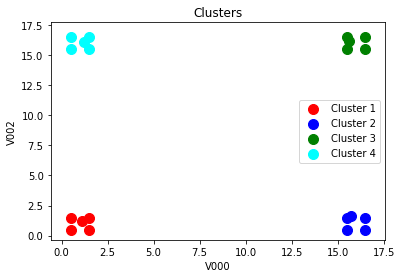

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

X = df.collect().values
#print(X)
y_kmeans = labels.select('CLUSTER_ID').collect().values.ravel()
#print(y_kmeans)
plt.scatter(X[y_kmeans == 0, 1], X[y_kmeans == 0, 3], s = 100, c = 'red'  , label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, 3], s = 100, c = 'blue' , label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 1], X[y_kmeans == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 1], X[y_kmeans == 3, 3], s = 100, c = 'cyan' , label = 'Cluster 4')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('V000')
plt.ylabel('V002')
plt.legend()
plt.show()

In [9]:
#Accelerated K Means
akm = clustering.KMeans(conn_context=connection_context, init='first_k',
                        thread_ratio=0.5, n_clusters=4,
                        distance_level='euclidean',
                        max_iter=100, category_weights=0.5,
                        categorical_variable=['V002'],
                        accelerated=True)
labels = akm.fit_predict(df, 'ID')
labels.collect()

,ID,CLUSTER_ID,DISTANCE,SLIGHT_SILHOUETTE
0,0,0,0.891088,0.944370
1,1,0,0.863917,0.942478
2,2,0,0.806252,0.946288
3,3,0,0.835684,0.944942
4,4,0,0.744571,0.950234
5,5,3,0.891088,0.940733
6,6,3,0.835684,0.944412
7,7,3,0.806252,0.946519
8,8,3,0.863917,0.946121
9,9,3,0.744571,0.949899


# SCIKIT Documentation Example

In [7]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_
kmeans.predict([[0, 0], [4, 4]])
kmeans.cluster_centers_


array([[1., 2.],
       [4., 2.]])

# SCIKIT Example with Hana Dataset

In [43]:
## Import and Setup for using HDI Schema
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from hana_ml import dataframe

labelencoder = LabelEncoder()

dbSchema = 'HANA_ML_DEMO_HDI_DB_1'
host =   'hxehost'
port =   '39015'
user =   'MLUSER'
password = 'Password1'


#define DataFrames
connection_context = dataframe.ConnectionContext(host, int(port), user, password)
df = connection_context.table('examples.PAL_KMEANS_DATA_TBL', schema=dbSchema)  

#Prepare DATA
X = df.select(['V000' , 'V002']).collect().values
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

predClusters = kmeans.predict(X)

print (X[:,0])

resultDF         = pd.DataFrame(X)
resultDF.columns = resultDF.columns+1
resultDF.index   = resultDF.index + 1
resultDF         = resultDF.rename(columns = {1:'V000', 2:'V002'})
resultDF['CLUSTER'] = predClusters
                                              
resultDF

[ 0.5  1.5  1.5  0.5  1.1  0.5  1.5  1.5  0.5  1.2 15.5 16.5 16.5 15.5
 15.6 15.5 16.5 16.5 15.5 15.7]


,V000,V002,CLUSTER
1,0.5,0.5,3
2,1.5,0.5,3
3,1.5,1.5,3
4,0.5,1.5,3
5,1.1,1.2,3
6,0.5,15.5,1
7,1.5,15.5,1
8,1.5,16.5,1
9,0.5,16.5,1
10,1.2,16.1,1
